# PySQkit introduction

In [1]:
import numpy as np
from copy import copy
import matplotlib.pyplot as plt
import pysqkit as sq
from pysqkit.util.linalg import tensor_prod

# Example single-qubit usage

In [2]:
fluxonium = sq.qubits.Fluxonium(
    label= 'Q1', 
    joseph_energy=3.395, 
    charge_energy=0.479, 
    induct_energy=0.132, 
    dim_hilbert = 150, 
    flux = 0.5
)

wf_dataset = fluxonium.wave_function(
    phase=np.linspace(-4*np.pi, 4*np.pi, 1000), 
    levels=range(3)
)

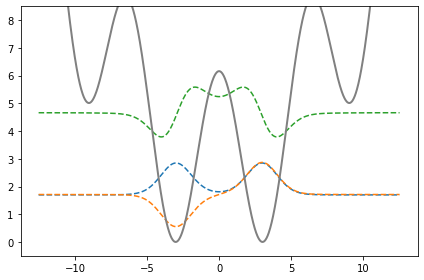

In [3]:
fig, ax = plt.subplots()

amp = 2*wf_dataset.joseph_energy/3
pot_offset = wf_dataset.potential.min()

shifted_wave_funcs = amp*wf_dataset.wave_func + wf_dataset.energy.data[:, np.newaxis] - pot_offset
for level in wf_dataset.level:
    ax.plot(wf_dataset.phase, shifted_wave_funcs.sel(level=level), '--')
    
ax.plot(wf_dataset.phase, (wf_dataset.potential - pot_offset), color='gray', lw=2)
ax.set_ylim(-0.5, 8.5)
plt.tight_layout()
plt.show()

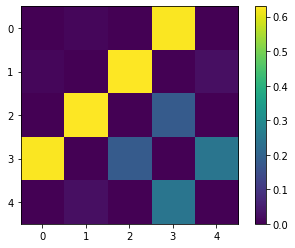

In [4]:
mat_elems = fluxonium.mat_elements(operator='charge_op', levels=5)
plt.imshow(np.abs(mat_elems))
plt.colorbar()
plt.show()

In [5]:
fluxonium.hamiltonian().shape

(150, 150)

In [6]:
full_dim = fluxonium.dim_hilbert
trunc_dim = 5

eig_enegies, eig_states = fluxonium.eig_states(levels=5)
fluxonium.diagonlize_basis(num_levels=5)

diag_hamil = fluxonium.hamiltonian()

In [7]:
assert np.allclose(eig_enegies, np.diag(diag_hamil))

In [8]:
assert np.allclose(diag_hamil, np.diag(np.diag(diag_hamil)))

In [9]:
fluxonium.hamiltonian(as_qobj=True)

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[-1.06987386e+00 -3.75113443e-16  1.70234781e-14  6.91866421e-18
  -1.53904954e-14]
 [-3.75113443e-16 -1.05599230e+00 -6.02183443e-16  3.69413816e-15
   1.63296936e-15]
 [ 1.73596709e-14 -6.02183443e-16  1.89492215e+00  3.79511457e-16
   2.07027386e-15]
 [ 6.91866421e-18  3.58463418e-15  3.79511457e-16  2.14840668e+00
   1.70466356e-15]
 [-1.52606662e-14  1.63296936e-15  2.71657041e-15  1.70466356e-15
   3.85387862e+00]]

In [10]:
fluxonium.charge_op(as_qobj=True)

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0.-7.83229313e-32j 0.-1.07895259e-02j 0.-9.86682266e-15j
  0.-6.25803383e-01j 0.-1.76341350e-15j]
 [0.+1.07895259e-02j 0.-1.51913273e-31j 0.+6.29809277e-01j
  0.-9.94220680e-15j 0.+2.66318601e-02j]
 [0.+9.86682266e-15j 0.-6.29809277e-01j 0.+3.60780537e-32j
  0.+1.82041298e-01j 0.-9.23904930e-15j]
 [0.+6.25803383e-01j 0.+9.94220680e-15j 0.-1.82041298e-01j
  0.+9.31510624e-32j 0.+2.45345327e-01j]
 [0.+1.76341350e-15j 0.-2.66318601e-02j 0.+9.23904930e-15j
  0.-2.45345327e-01j 0.+9.02194953e-30j]]

In [11]:
np.allclose(np.abs(mat_elems.data), np.abs(fluxonium.charge_op()))

True

## Example two-qubit usage

In [12]:
fluxonium_A = sq.qubits.Fluxonium(
    label='A', 
    joseph_energy=5.5, 
    charge_energy=1.5, 
    induct_energy=1, 
    flux = 0.5, 
    dim_hilbert = 150
)

fluxonium_B = sq.qubits.Fluxonium(
    label='B', 
    joseph_energy=5.7, 
    charge_energy=1.2, 
    induct_energy=1, 
    flux = 0.5, 
    dim_hilbert = 150
)

for qubit in [fluxonium_A, fluxonium_B]:
    qubit.diagonlize_basis(num_levels=6)

coupled_sys = fluxonium_A.couple_to(fluxonium_B, coupling=sq.couplers.capacitive_coupling, strength=0.2)

In [13]:
sys_hamil = coupled_sys.hamiltonian()
bare_hamil = coupled_sys.bare_hamiltonian()
int_hamil = coupled_sys.int_hamiltonian()

In [14]:
assert(np.allclose(sys_hamil, bare_hamil+int_hamil))

In [15]:
coupled_sys.hamiltonian(as_qobj=True)

Quantum object: dims = [[6, 6], [6, 6]], shape = (36, 36), type = oper, isherm = True
Qobj data =
[[ 3.79955558e+00  0.00000000e+00  0.00000000e+00 ...  1.08810871e-05
   0.00000000e+00 -4.63359310e-07]
 [ 0.00000000e+00  4.15388083e+00  0.00000000e+00 ...  0.00000000e+00
  -5.31877710e-06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  8.92023852e+00 ... -1.21913582e-05
   0.00000000e+00  7.05504749e-06]
 ...
 [ 1.08810871e-05  0.00000000e+00 -1.21913582e-05 ...  2.90489831e+01
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.31877710e-06  0.00000000e+00 ...  0.00000000e+00
   3.29633547e+01  0.00000000e+00]
 [-4.63359310e-07  0.00000000e+00  7.05504749e-06 ...  0.00000000e+00
   0.00000000e+00  3.68097471e+01]]

In [16]:
diag_hamil_A = fluxonium_A.hamiltonian()
diag_hamil_B = fluxonium_B.hamiltonian()

In [17]:
np.allclose(bare_hamil, tensor_prod([diag_hamil_A, np.eye(*diag_hamil_B.shape)]) + tensor_prod([np.eye(*diag_hamil_A.shape), diag_hamil_B]))

True

In [18]:
cap_coupling = sq.couplers.capacitive_coupling(
    qubits=[fluxonium_A, fluxonium_B],
    strength = 0.2,
)

In [19]:
cap_coupling.hamiltonian().shape

(36, 36)

In [20]:
np.allclose(int_hamil, cap_coupling.hamiltonian())

True

In [30]:
also_cap_coupling = sq.Coupling(
    prefactors=0.2,
    operators=dict(A=fluxonium_A.charge_op(), B=fluxonium_B.charge_op()),
    qubits=['A', 'B']
)

In [31]:
np.allclose(int_hamil, also_cap_coupling.hamiltonian())

True

In [32]:
double_cap_coupling = sq.Coupling(
    prefactors=[0.2, 0.2],
    operators=[dict(A=fluxonium_A.charge_op(), B=fluxonium_B.charge_op()), dict(A=fluxonium_A.charge_op(), B=fluxonium_B.charge_op())],
    qubits=['A', 'B']
)

In [34]:
np.allclose(2*int_hamil, double_cap_coupling.hamiltonian())

True